In [135]:
df=[]
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
df = yf.download(["2330.TW","2454.TW","2308.TW","2881.TW","2882.TW","2886.TW","1513.TW","6443.TW","3576.TW","2412.TW","3045.TW","4904.TW","3252.TWO","2756.TWO","2736.TWO","9921.TW","9914.TW","5306.TW"], interval="1d", period="5y")
prc = df['Adj Close']
ret = prc.pct_change()



[*********************100%***********************]  18 of 18 completed


In [136]:
ret_is = ret.loc['2021']
ret_oos = ret.loc['2022']
ret_oos.loc[pd.to_datetime('2022-01-01')] = 0



ret_oos = ret_oos.sort_index()


In [137]:
ER = ret_is.mean()
S = ret_is.cov()


In [138]:
def pvar(w, S):
    return (w.T @ S @ w)

def pret(w, ER):
    return (w.T @ ER)

def sharpe(w, ER, S):
    return -(w.T @ ER)/ ((w.T @ S @ w) ** 0.5)

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.optimize import minimize
from scipy.optimize import Bounds
N = len(ER)
# initial guess for portfolio weights
# equally weighted portfolio : 1/N = 1/5
x0 = np.ones(N)/N



Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.8982437213847335e-05
            Iterations: 52
            Function evaluations: 988
            Gradient evaluations: 52
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.1646734342902948
            Iterations: 16
            Function evaluations: 304
            Gradient evaluations: 16


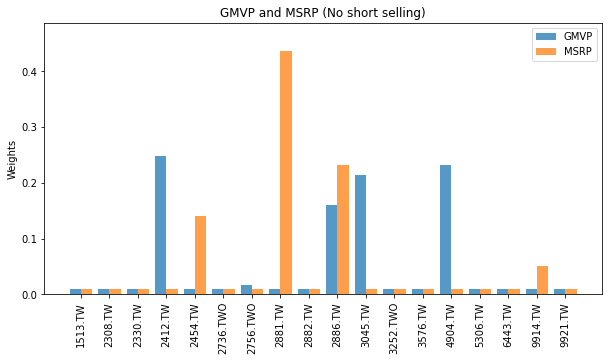

In [140]:
# define no short selling constraint
bounds = Bounds(0.01, 1)
x0 = np.ones(N)/N
cons = ({'type': 'eq', 'fun' : lambda x: np.sum(x) - 1})
GMVPnoSS = minimize(pvar, x0, method='SLSQP', constraints=cons, args=S,
options={'disp': True, 'ftol': 1e-9}, bounds=bounds)
MSRPnoSS = minimize(sharpe, x0, method='SLSQP', args=(ER, S), constraints=cons,
options={'disp': True, 'ftol': 1e-9}, bounds=bounds)
plt.figure(figsize=(10, 5))
ind = np.arange(N)
plt.bar(ind, GMVPnoSS.x, width=0.4, alpha=0.75, )
plt.bar(ind + 0.4, MSRPnoSS.x, width=0.4, alpha=0.75, )
plt.xticks(ind + 0.4/2, ER.index)
plt.xticks(rotation = 90)
plt.ylim([0, np.max([MSRPnoSS.x, GMVPnoSS.x]) + 0.05 ])
plt.ylabel('Weights')
plt.legend(['GMVP','MSRP'])
plt.title('GMVP and MSRP (No short selling)')
plt.show()


Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.065920945961193e-05
            Iterations: 47
            Function evaluations: 893
            Gradient evaluations: 47
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.1646734342902948
            Iterations: 16
            Function evaluations: 304
            Gradient evaluations: 16


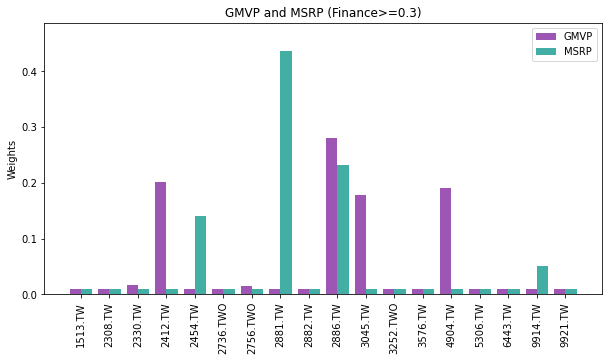

In [141]:
bounds = Bounds(0.01, 1)
# define pre-assignment constraint
x0 = np.ones(N)/N
cons = ({'type': 'eq', 'fun' : lambda x: np.sum(x) - 1},
{'type': 'ineq', 'fun': lambda x: x[7]+x[8]+x[9] - 0.3},)
GMVPnoSSFinance = minimize(pvar, x0, method='SLSQP', constraints=cons, args=S,
options={'disp': True, 'ftol': 1e-9}, bounds=bounds)
MSRPnoSSFinance = minimize(sharpe, x0, method='SLSQP', args=(ER, S),
constraints=cons, options={'disp': True, 'ftol': 1e-9}, bounds=bounds)
plt.figure(figsize=(10, 5))
ind = np.arange(N)
plt.bar(ind, GMVPnoSSFinance.x, width=0.4, alpha=0.75, color='xkcd:purple')
plt.bar(ind + 0.4, MSRPnoSSFinance.x, width=0.4, alpha=0.75, color='xkcd:teal')
plt.xticks(ind + 0.4/2, ER.index)
plt.xticks(rotation = 90)
plt.ylim([0, np.max([MSRPnoSSFinance.x, GMVPnoSSFinance.x]) + 0.05 ])
plt.ylabel('Weights')
plt.legend(['GMVP','MSRP'])
plt.title('GMVP and MSRP (Finance>=0.3)')
plt.show()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 8.246929983243446e-05
            Iterations: 37
            Function evaluations: 703
            Gradient evaluations: 37
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.1150186223850828
            Iterations: 7
            Function evaluations: 133
            Gradient evaluations: 7


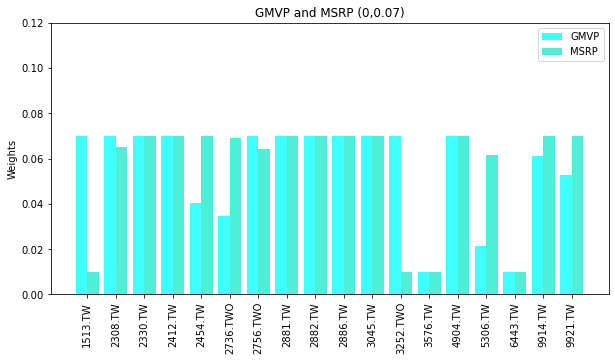

In [142]:
bounds1 = Bounds(0.01, 0.07)
# define pre-assignment constraint
x0 = np.ones(N)/N
cons = ({'type': 'eq', 'fun' : lambda x: np.sum(x) - 1})
GMVPnoSSnoCC = minimize(pvar, x0, method='SLSQP', constraints=cons, args=S,
options={'disp': True, 'ftol': 1e-9}, bounds=bounds1)
MSRPnoSSnoCC = minimize(sharpe, x0, method='SLSQP', args=(ER, S),
constraints=cons, options={'disp': True, 'ftol': 1e-9}, bounds=bounds1)
plt.figure(figsize=(10, 5))
ind = np.arange(N)
plt.bar(ind, GMVPnoSSnoCC.x, width=0.4, alpha=0.75, color='xkcd:cyan')
plt.bar(ind + 0.4, MSRPnoSSnoCC.x, width=0.4, alpha=0.75, color='xkcd:aqua')
plt.xticks(ind + 0.4/2, ER.index)
plt.xticks(rotation = 90)
plt.ylim([0, np.max([MSRPnoSSnoCC.x, GMVPnoSSnoCC.x]) + 0.05 ])
plt.ylabel('Weights')
plt.legend(['GMVP','MSRP'])
plt.title('GMVP and MSRP (0,0.07)')
plt.show()

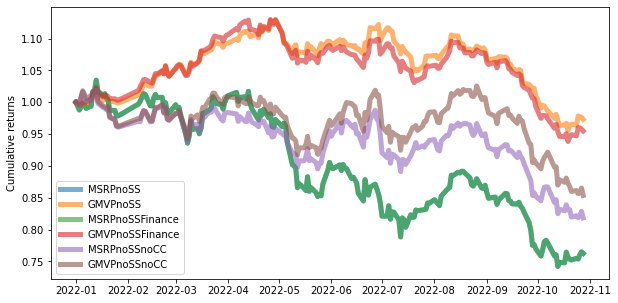

In [143]:
cret_oos = (1 + ret_oos).cumprod()
MSRPnoSS_cret = cret_oos.multiply(MSRPnoSS.x).sum(axis=1)
GMVPnoSS_cret = cret_oos.multiply(GMVPnoSS.x).sum(axis=1)
MSRPnoSSFinance_cret = cret_oos.multiply(MSRPnoSSFinance.x).sum(axis=1)
GMVPnoSSFinance_cret = cret_oos.multiply(GMVPnoSSFinance.x).sum(axis=1)
MSRPnoSSnoCC_cret = cret_oos.multiply(MSRPnoSSnoCC.x).sum(axis=1)
GMVPnoSSnoCC_cret = cret_oos.multiply(GMVPnoSSnoCC.x).sum(axis=1)
strat = pd.concat([MSRPnoSS_cret, GMVPnoSS_cret,MSRPnoSSFinance_cret, GMVPnoSSFinance_cret,MSRPnoSSnoCC_cret,GMVPnoSSnoCC_cret], axis=1)
plt.figure(figsize=(10, 5))
plt.plot(strat, alpha=0.6,linewidth=5)
plt.legend(['MSRPnoSS', 'GMVPnoSS', 'MSRPnoSSFinance',
'GMVPnoSSFinance',"MSRPnoSSnoCC","GMVPnoSSnoCC"])
plt.ylabel('Cumulative returns')
plt.show()

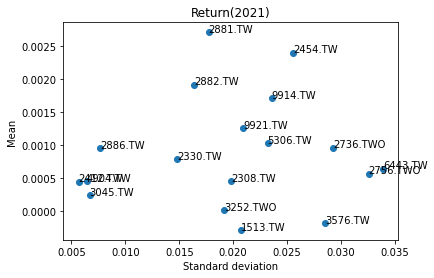

In [144]:
x = ret_is.std()
y = ret_is.mean()
text = x.index.to_list()
plt.scatter(x, y)

for i in range(len(x)):
     plt.annotate(text[i], (x[i], y[i]))
plt.title('Return(2021)')
plt.xlabel('Standard deviation')
plt.ylabel('Mean')
plt.show()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.8982437213847335e-05
            Iterations: 52
            Function evaluations: 988
            Gradient evaluations: 52
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.8982437213847335e-05
            Iterations: 52
            Function evaluations: 988
            Gradient evaluations: 52
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.8982437213847335e-05
            Iterations: 52
            Function evaluations: 988
            Gradient evaluations: 52
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.9426335963839714e-05
            Iterations: 51
            Function evaluations: 969
            Gradient evaluations: 51
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.0109356379361225e-05
            Iterations: 64


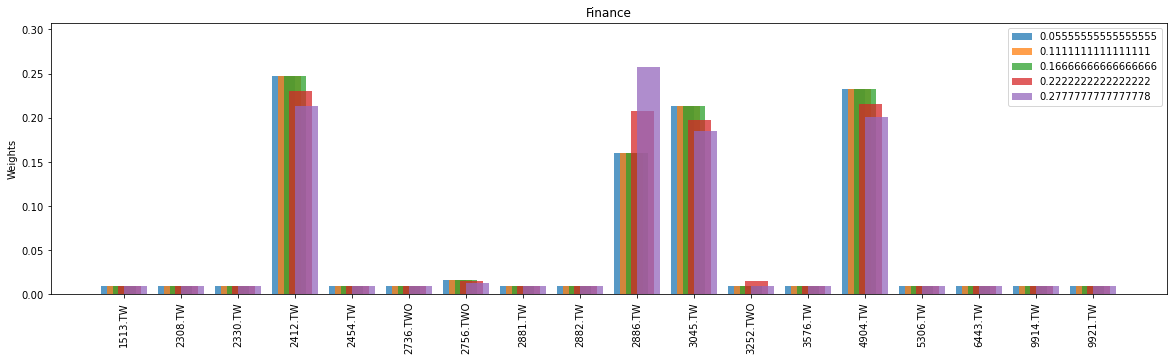

In [145]:
list1=[]
name=[] 
bounds1 = Bounds(0.01, 1)
# define pre-assignment constraint
x0 = np.ones(N)/N
for i in range(5):
    cons1 = ({'type': 'eq', 'fun' : lambda x: np.sum(x) - 1},
    {'type': 'ineq', 'fun': lambda x: x[7]+x[8]+x[9] - 1/N-i/N},)
    avg = minimize(pvar, x0, method='SLSQP', constraints=cons1, args=S,
    options={'disp': True, 'ftol': 1e-9}, bounds=bounds1)
    list1.append(avg)
plt.figure(figsize=(20, 5))
ind = np.arange(N)
np1 = np.array(list1)
maxi=0
for i in range(5):
    plt.bar(ind+i/10, np1[i].x, width=0.4, alpha=0.75)
    name.append(1/N+i/N)
    
plt.xticks(ind + 0.4/2, ER.index)
plt.xticks(rotation = 90)

plt.ylabel('Weights')
maxi=np.max([np1[i].x])
plt.ylim([0, maxi + 0.05 ])
plt.legend(name)
plt.title('Finance')
plt.show()

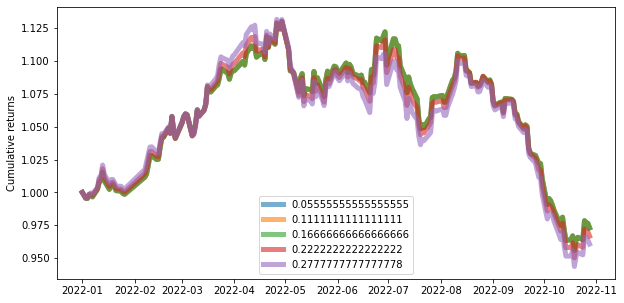

In [146]:
cret_oos = (1 + ret_oos).cumprod()
series=[]
for i in range(5):
    series.append(cret_oos.multiply(np1[i].x).sum(axis=1))
strat = pd.concat(series, axis=1)
plt.figure(figsize=(10, 5))
plt.plot(strat, alpha=0.6,linewidth=5)
plt.legend(name)
plt.ylabel('Cumulative returns')
plt.show()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.010935637594654e-05
            Iterations: 64
            Function evaluations: 1216
            Gradient evaluations: 64
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.119313154049863e-05
            Iterations: 54
            Function evaluations: 1026
            Gradient evaluations: 54


C:\Users\Ryan Lin\anaconda3\lib\site-packages\scipy\optimize\optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.256753980559624e-05
            Iterations: 50
            Function evaluations: 950
            Gradient evaluations: 50
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.426724349069413e-05
            Iterations: 46
            Function evaluations: 874
            Gradient evaluations: 46
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.629018790801156e-05
            Iterations: 44
            Function evaluations: 836
            Gradient evaluations: 44


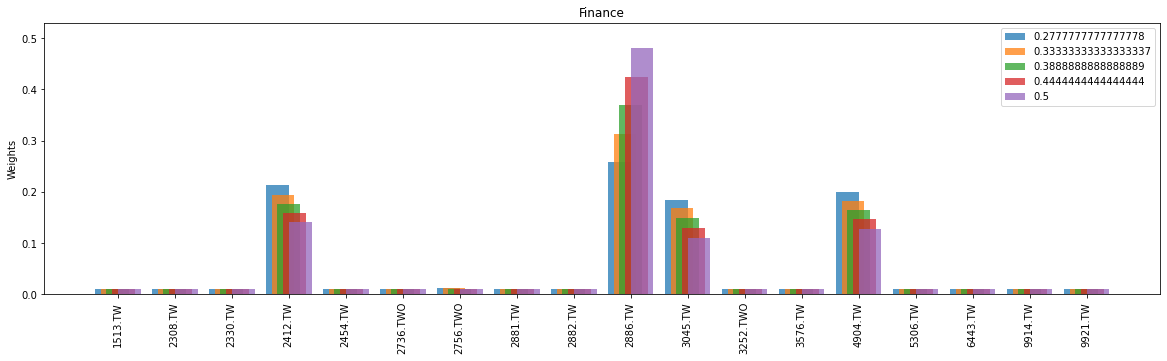

In [147]:
list2=[]
name2=[] 
bounds1 = Bounds(0.01, 1)
# define pre-assignment constraint
x0 = np.ones(N)/N
for i in range(5):
    cons = ({'type': 'eq', 'fun' : lambda x: np.sum(x) - 1},
    {'type': 'ineq', 'fun': lambda x: x[7]+x[8]+x[9] - 5/N-i/N},)
    avg = minimize(pvar, x0, method='SLSQP', constraints=cons, args=S,
    options={'disp': True, 'ftol': 1e-9}, bounds=bounds1)
    list2.append(avg)
plt.figure(figsize=(20, 5))
ind = np.arange(N)
np2 = np.array(list2)
maxi=0
for i in range(5):
    plt.bar(ind+i/10, np2[i].x, width=0.4, alpha=0.75)
    name2.append(5/N+i/N)
    
plt.xticks(ind + 0.4/2, ER.index)
plt.xticks(rotation = 90)

plt.ylabel('Weights')
maxi=np.max([np2[i].x])
plt.ylim([0, maxi + 0.05 ])
plt.legend(name2)
plt.title('Finance')
plt.show()

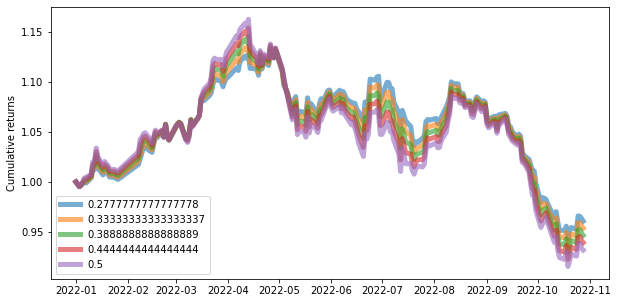

In [148]:
cret_oos = (1 + ret_oos).cumprod()
series=[]
for i in range(5):
    series.append(cret_oos.multiply(np2[i].x).sum(axis=1))
strat = pd.concat(series, axis=1)
plt.figure(figsize=(10, 5))
plt.plot(strat, alpha=0.6,linewidth=5)
plt.legend(name2)
plt.ylabel('Cumulative returns')
plt.show()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.8982437213847335e-05
            Iterations: 52
            Function evaluations: 988
            Gradient evaluations: 52
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.9426335963839714e-05
            Iterations: 51
            Function evaluations: 969
            Gradient evaluations: 51
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.0109356379361225e-05
            Iterations: 64
            Function evaluations: 1216
            Gradient evaluations: 64
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.1193131540457845e-05
            Iterations: 54
            Function evaluations: 1026
            Gradient evaluations: 54
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.256753980513173e-05
            Iterations: 50

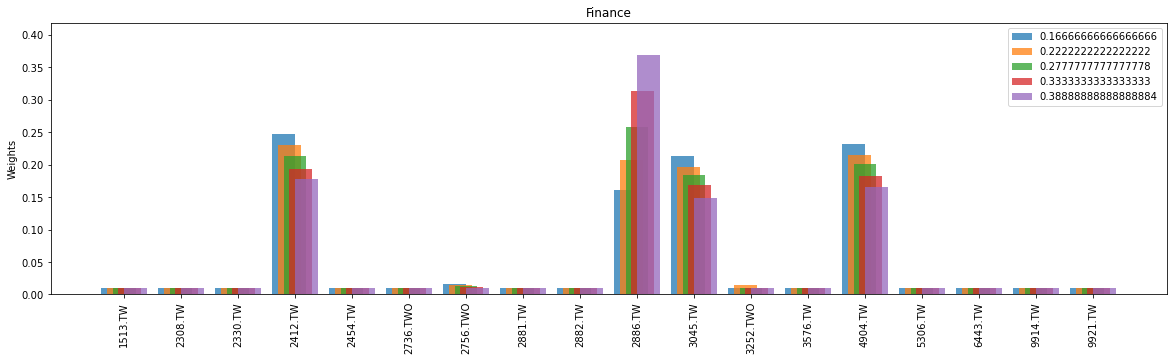

In [149]:
list3=[]
name3=[] 
bounds1 = Bounds(0.01, 1)
x0 = np.ones(N)/N
for i in range(5):
    cons = ({'type': 'eq', 'fun' : lambda x: np.sum(x) - 1},
    {'type': 'ineq', 'fun': lambda x: x[7]+x[8]+x[9] - 3/N-i/N},)
    avg = minimize(pvar, x0, method='SLSQP', constraints=cons, args=S,
    options={'disp': True, 'ftol': 1e-9}, bounds=bounds1)
    list3.append(avg)
plt.figure(figsize=(20, 5))
ind = np.arange(N)
np3 = np.array(list3)
maxi=0
for i in range(5):
    plt.bar(ind+i/10, np3[i].x, width=0.4, alpha=0.75)
    name3.append(3/N+i/N)
    
plt.xticks(ind + 0.4/2, ER.index)
plt.xticks(rotation = 90)

plt.ylabel('Weights')
maxi=np.max([np3[i].x])
plt.ylim([0, maxi + 0.05 ])
plt.legend(name3)
plt.title('Finance')
plt.show()

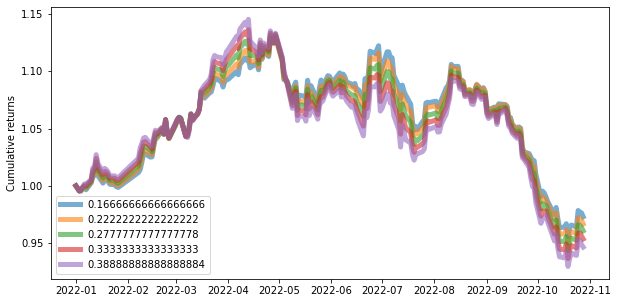

In [150]:
cret_oos = (1 + ret_oos).cumprod()
series=[]
for i in range(5):
    series.append(cret_oos.multiply(np3[i].x).sum(axis=1))
strat = pd.concat(series, axis=1)
plt.figure(figsize=(10, 5))
plt.plot(strat, alpha=0.6,linewidth=5)
plt.legend(name3)
plt.ylabel('Cumulative returns')
plt.show()

In [151]:
np3[2].x-GMVPnoSS.x

array([ 0.00000000e+00,  0.00000000e+00, -1.73472348e-18, -3.36129279e-02,
       -1.73472348e-18,  6.93889390e-18, -3.18650287e-03,  1.38777878e-17,
       -5.20417043e-18,  9.75725454e-02, -2.91481372e-02,  0.00000000e+00,
       -3.46944695e-18, -3.16249775e-02,  6.93889390e-18,  0.00000000e+00,
        0.00000000e+00,  3.46944695e-18])

In [152]:
np3[2].x

array([0.01      , 0.01      , 0.01      , 0.21379629, 0.01      ,
       0.01      , 0.01306825, 0.01      , 0.01      , 0.25777778,
       0.18474814, 0.01      , 0.01      , 0.20060954, 0.01      ,
       0.01      , 0.01      , 0.01      ])

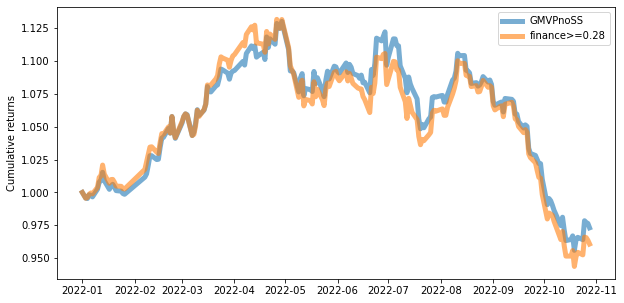

In [153]:
cret_oos = (1 + ret_oos).cumprod()
GMVPnoSS_cret = cret_oos.multiply(GMVPnoSS.x).sum(axis=1)
avgmaxi_cret = cret_oos.multiply(np3[2].x).sum(axis=1)
strat = pd.concat([GMVPnoSS_cret,avgmaxi_cret], axis=1)
plt.figure(figsize=(10, 5))
plt.plot(strat, alpha=0.6,linewidth=5)
plt.legend(['GMVPnoSS', "finance>=0.28"])
plt.ylabel('Cumulative returns')
plt.show()

In [154]:
np3[2].x

array([0.01      , 0.01      , 0.01      , 0.21379629, 0.01      ,
       0.01      , 0.01306825, 0.01      , 0.01      , 0.25777778,
       0.18474814, 0.01      , 0.01      , 0.20060954, 0.01      ,
       0.01      , 0.01      , 0.01      ])

[*********************100%***********************]  1 of 1 completed


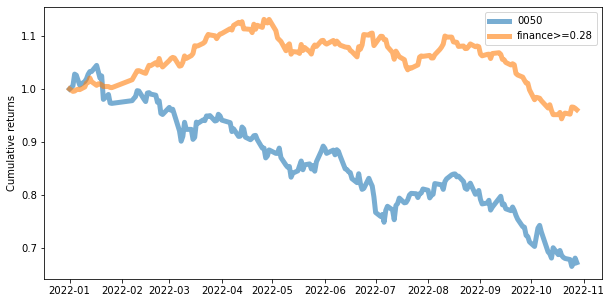

In [155]:
df1 = yf.download("0050.TW")
prc1 = df1['Adj Close']
ret1 = prc1.pct_change()
ret_is1 = ret1.loc['2021']
ret_oos1 = ret1.loc['2022']
ret_oos1.loc[pd.to_datetime('2022-01-01')] = 0
ret_oos1 = ret_oos1.sort_index()
etf=np.array([1])
cret_oos = (1 + ret_oos).cumprod()
cret_oos1 = (1 + ret_oos1).cumprod()

avgmaxi_cret = cret_oos.multiply(np3[2].x).sum(axis=1)
strat = pd.concat([cret_oos1,avgmaxi_cret], axis=1)
plt.figure(figsize=(10, 5))
plt.plot(strat, alpha=0.6,linewidth=5)
plt.legend(['0050', "finance>=0.28"])
plt.ylabel('Cumulative returns')
plt.show()

In [156]:
avgmaxi_cret

Date
2022-01-01    1.000000
2022-01-03    0.995575
2022-01-04    0.996173
2022-01-05    0.998478
2022-01-06    0.999596
                ...   
2022-10-24    0.952507
2022-10-25    0.966011
2022-10-26    0.965599
2022-10-27    0.963565
2022-10-28    0.960745
Length: 202, dtype: float64

Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.8982437213847335e-05
            Iterations: 52
            Function evaluations: 988
            Gradient evaluations: 52
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.010935637594654e-05
            Iterations: 64
            Function evaluations: 1216
            Gradient evaluations: 64


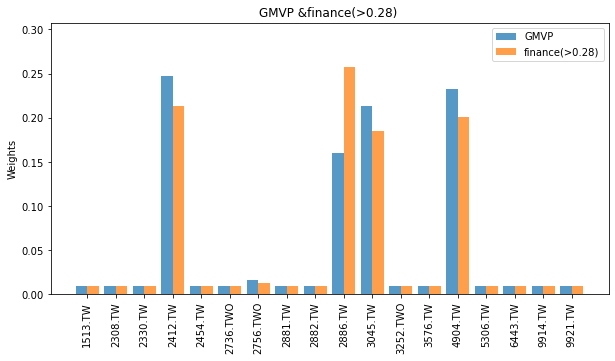

In [157]:
# define no short selling constraint
bounds = Bounds(0.01, 1)
x0 = np.ones(N)/N
cons = ({'type': 'eq', 'fun' : lambda x: np.sum(x) - 1})
cons1=  ({'type': 'eq', 'fun' : lambda x: np.sum(x) - 1},
    {'type': 'ineq', 'fun': lambda x: x[7]+x[8]+x[9] - 5/N})
   
GMVPnoSS = minimize(pvar, x0, method='SLSQP', constraints=cons, args=S,
options={'disp': True, 'ftol': 1e-9}, bounds=bounds)
finance= minimize(pvar, x0, method='SLSQP', constraints=cons1, args=S,
options={'disp': True, 'ftol': 1e-9}, bounds=bounds)
plt.figure(figsize=(10, 5))
ind = np.arange(N)
plt.bar(ind, GMVPnoSS.x, width=0.4, alpha=0.75, )
plt.bar(ind + 0.4, finance.x, width=0.4, alpha=0.75, )
plt.xticks(ind + 0.4/2, ER.index)
plt.xticks(rotation = 90)
plt.ylim([0, np.max([finance.x, GMVPnoSS.x]) + 0.05 ])
plt.ylabel('Weights')
plt.legend(['GMVP','finance(>0.28)'])
plt.title('GMVP &finance(>0.28) ')
plt.show()


Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.010935637594654e-05
            Iterations: 64
            Function evaluations: 1216
            Gradient evaluations: 64


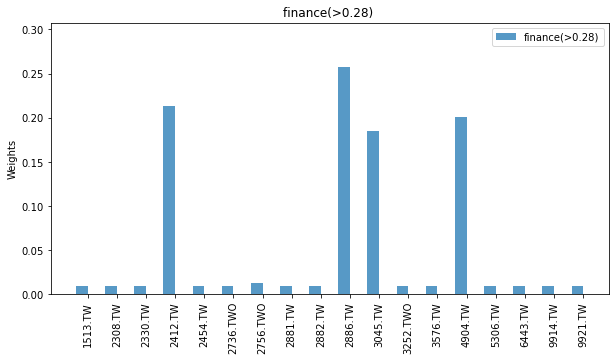

In [159]:
# define no short selling constraint
bounds = Bounds(0.01, 1)
x0 = np.ones(N)/N
cons1=  ({'type': 'eq', 'fun' : lambda x: np.sum(x) - 1},
    {'type': 'ineq', 'fun': lambda x: x[7]+x[8]+x[9] - 5/N})
   
finance= minimize(pvar, x0, method='SLSQP', constraints=cons1, args=S,
options={'disp': True, 'ftol': 1e-9}, bounds=bounds)
plt.figure(figsize=(10, 5))
ind = np.arange(N)

plt.bar(ind , finance.x, width=0.4, alpha=0.75, )
plt.xticks(ind + 0.4/2, ER.index)
plt.xticks(rotation = 90)
plt.ylim([0, np.max([finance.x]) + 0.05 ])
plt.ylabel('Weights')
plt.legend(['finance(>0.28)'])
plt.title('finance(>0.28) ')
plt.show()
